In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import std

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/train.csv')
kaggle_test_data = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/test.csv")

#1. Data preprocessing and feature engineering

In [ ]:
# We changed the encoding of survived from (0,1) to (-1,1) where 0 and -1 = not survived
data["Survived"] = data["Survived"].apply(lambda x: 1 if x == 1 else -1)
data["Survived"].value_counts()

-1    549
 1    342
Name: Survived, dtype: int64

In [ ]:
#Encoding the Sex variable
def encode_sex(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1

data['Sexcode'] = data['Sex'].apply(encode_sex)
kaggle_test_data['Sexcode'] = kaggle_test_data['Sex'].apply(encode_sex)

In [ ]:
#Creating a new variable: 5 categories for the different prices paid (Fare)
def categorize_fare(x):
    if x == 0:
        return 0
    elif x < 15:
        return 1
    elif x < 30:
        return 2
    elif x < 100:
        return 3
    else:
        return 4
data['FareCat']= data['Fare'].apply(categorize_fare)
kaggle_test_data['FareCat']= kaggle_test_data['Fare'].apply(categorize_fare)

In [ ]:
#Creating a new variable with the number of family members each passenger has on board
data['FamilyCount']=data['Parch']+data['SibSp']+1
kaggle_test_data['FamilyCount']=kaggle_test_data['Parch']+kaggle_test_data['SibSp']+1

In [ ]:
#Filling missing values in Age with the median
data['Age']= data['Age'].fillna(data['Age'].dropna().median())
kaggle_test_data['Age']= kaggle_test_data['Age'].fillna(kaggle_test_data['Age'].dropna().median())
#Filling missing values in Fare
kaggle_test_data['Fare']= kaggle_test_data['Fare'].fillna(kaggle_test_data['Fare'].dropna().median())

In [ ]:
#Creating 5 categories for Age to have values ranging from 0 to 4
def categorize_age(x):
    if x <= 16:
        return 0
    elif x <= 32:
        return 1
    elif x <= 48:
        return 2
    elif x <= 64:
        return 3
    elif x <= 80:
        return 4

data['AgeCat'] = data['Age'].apply(categorize_age)
kaggle_test_data['AgeCat']= kaggle_test_data['Age'].apply(categorize_age)

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Replacing missing values with most frequent one
data['Embarked'] = data['Embarked'].fillna('S')
kaggle_test_data['Embarked'] = kaggle_test_data['Embarked'].fillna('S')
#Dummifying the embarked variable
data =  pd.concat([data, pd.get_dummies(data["Embarked"],prefix="Embarked")], axis=1, join="inner")
kaggle_test_data =  pd.concat([kaggle_test_data, pd.get_dummies(kaggle_test_data["Embarked"],prefix="Embarked")], axis=1, join="inner")

In [ ]:
#Dummifying the Pclass variable
data =  pd.concat([data, pd.get_dummies(data["Pclass"],prefix="Pclass")], axis=1, join="inner")
kaggle_test_data =  pd.concat([kaggle_test_data, pd.get_dummies(kaggle_test_data["Pclass"],prefix="Pclass")], axis=1, join="inner")

In [ ]:
#Creating a new variable: 5 categories for the different prices paid (Fare)
def categorize_embarked(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x== 'Q':
        return 2
data['EmbarkedCat']= data['Embarked'].apply(categorize_embarked)
kaggle_test_data['EmbarkedCat']= kaggle_test_data['Embarked'].apply(categorize_embarked)

# 2. Decision tree

## 2.1. Results of default model

In [ ]:
X = data[["Pclass","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]#data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

In [ ]:
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier()

fitted_dtree = dtree.fit(X_train, y_train)
print(fitted_dtree) 

train_accuracy = dtree.score(X_train, y_train)

predictions = dtree.predict(X_test)
print(f'Training accuracy: {round(train_accuracy,3)}')
print(confusion_matrix(y_test,predictions))
#Text report with the main classification metrics
report = classification_report(y_test,predictions)
print(report)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy: 0.945
[[136  18]
 [ 38  76]]
              precision    recall  f1-score   support

          -1       0.78      0.88      0.83       154
           1       0.81      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
X = data[variables]
y = data.Survived
# Cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Instantiate model
kfoldtree = DecisionTreeClassifier()

# Model evaluation
scores = cross_val_score(kfoldtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Performance

print(f'Accuracy for all folds: {scores}')
print(f'Mean accuracy: {round(mean(scores),2)}')
print(f'Standard deviation: {round(std(scores),2)}')

Accuracy for all folds: [0.77094972 0.78651685 0.83707865 0.82022472 0.81460674]
Mean accuracy: 0.81
Standard deviation: 0.02


## 2.2. min_samples_split

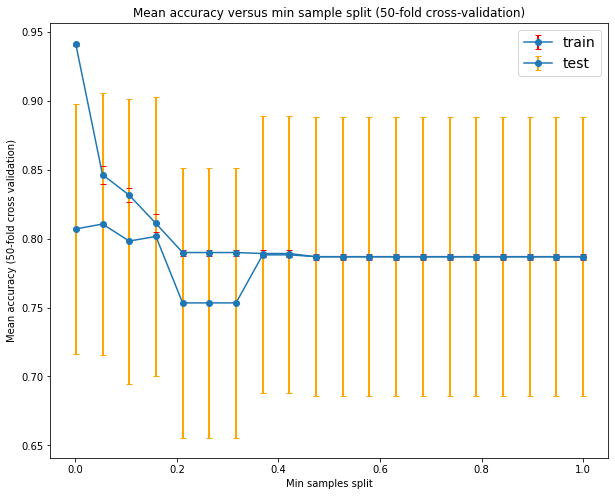

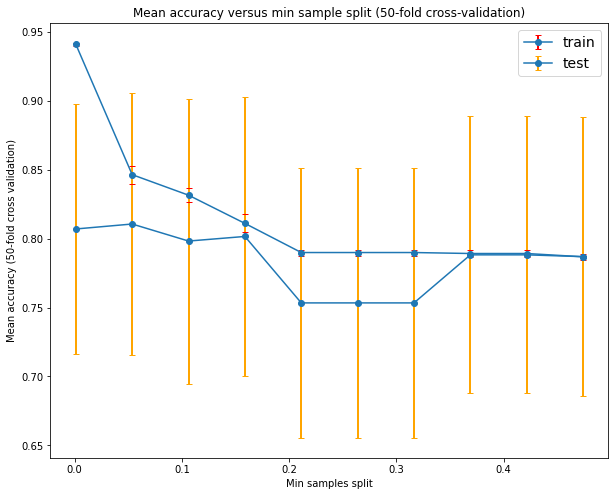

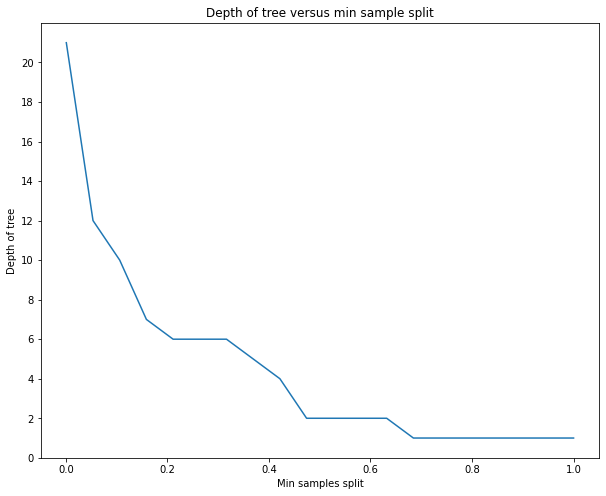

In [ ]:
folds = 50
min_samples_splits = np.linspace(0.001, 1, 20, endpoint=True)

accuracy = np.zeros((2, folds, min_samples_splits.shape[0]), dtype=float)
depths = [0]*min_samples_splits.shape[0]

i=0
for min_samples_split in min_samples_splits:
  kfoldtree = DecisionTreeClassifier(min_samples_split=min_samples_split)
  cv = KFold(folds, random_state=1, shuffle=True)
  cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']

  kfoldtree.fit(X_scaled,y)
  depths[i] = kfoldtree.get_depth()
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)

fig = plt.figure(figsize=(10,8))

plt.errorbar(min_samples_splits, accuracy_mean[0,:], accuracy_std[0,:], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(min_samples_splits, accuracy_mean[1,:], accuracy_std[1,:], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')
#plt.plot(min_samples_splits, accuracy_mean[0,:], '-', label='train')
#plt.plot(min_samples_splits, accuracy_mean[1,:], '-',  label='test')

plt.legend(fontsize=14)
plt.xlabel('Min samples split')
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)')
plt.show()

#We remove the last part of previous graph
fig = plt.figure(figsize=(10,8))

plt.errorbar(min_samples_splits[:10], accuracy_mean[0,:10], accuracy_std[0,:10], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(min_samples_splits[:10], accuracy_mean[1,:10], accuracy_std[1,:10], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')

plt.legend(fontsize=14)
plt.xlabel('Min samples split')
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus min sample split ({folds}-fold cross-validation)')
plt.show()

#We plot the  depths of the generated trees
fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_splits, depths, '-')
plt.yticks(np.arange(0, 22, 2.0))
plt.xlabel('Min samples split')
plt.ylabel(f'Depth of tree')
plt.title(f'Depth of tree versus min sample split')
plt.show()

## 2.3. min_samples_leaf

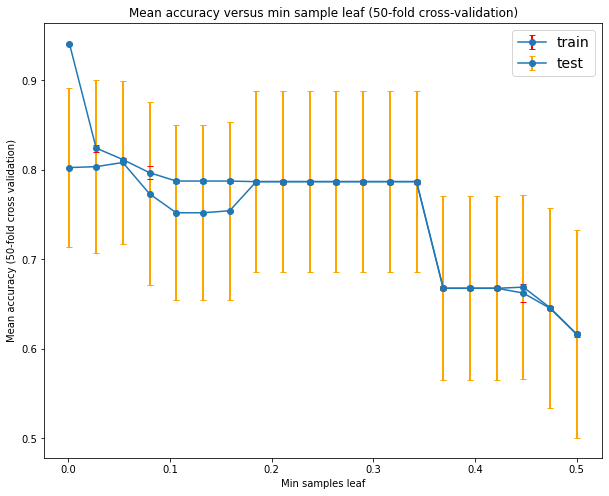

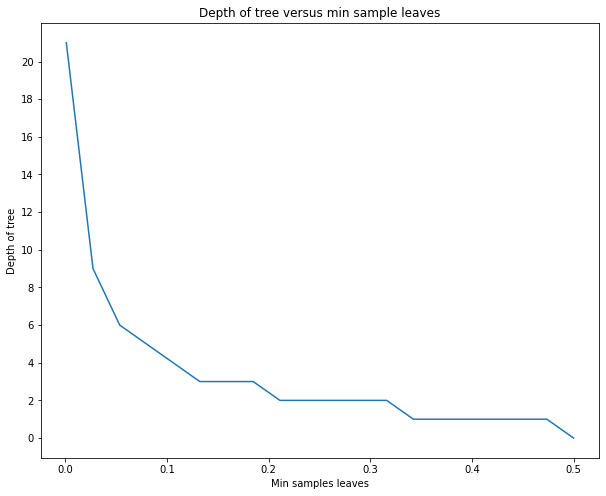

In [ ]:
folds = 50
min_samples_leaves = np.linspace(0.001, 0.5, 20, endpoint=True)
accuracy = np.zeros((2, folds, min_samples_leaves.shape[0]), dtype=float)
depths = [0]*min_samples_leaves.shape[0]

i=0
for min_samples_leaf in min_samples_leaves:
  kfoldtree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)#, max_depth=4)
  cv = KFold(folds, random_state=1, shuffle=True)
  cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  kfoldtree.fit(X_scaled,y)
  depths[i] = kfoldtree.get_depth()
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))
plt.errorbar(min_samples_leaves, accuracy_mean[0,:], accuracy_std[0,:], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(min_samples_leaves, accuracy_mean[1,:], accuracy_std[1,:], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')
#plt.plot(min_samples_leaves, accuracy_mean[0,:], '-', label='train')
#plt.plot(min_samples_leaves, accuracy_mean[1,:], '-',  label='test')
plt.legend(fontsize=14)
plt.xlabel('Min samples leaf')
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus min sample leaf ({folds}-fold cross-validation)')
plt.show()

#We plot the  depths of the generated trees
fig = plt.figure(figsize=(10,8))

plt.plot(min_samples_leaves, depths, '-')
plt.yticks(np.arange(0, 22, 2.0))
plt.xlabel('Min samples leaves')
plt.ylabel(f'Depth of tree')
plt.title(f'Depth of tree versus min sample leaves')
plt.show()

## 2.4. Depth limitation

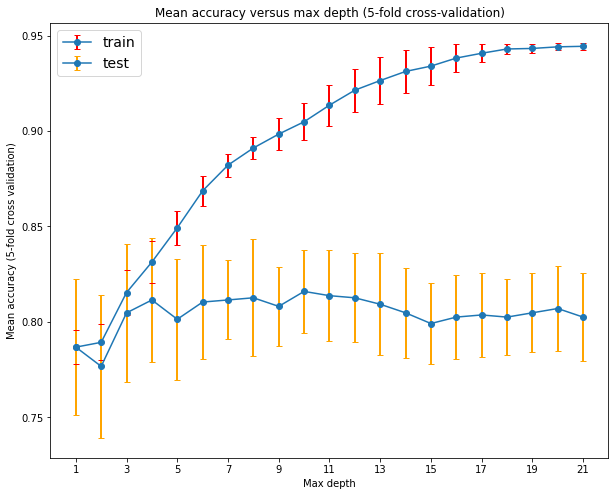

In [ ]:
folds = 5
max_depths = range(1,22)
accuracy = np.zeros((2, folds, len(max_depths)), dtype=float)

i=0
for d in max_depths:
  kfoldtree = DecisionTreeClassifier(max_depth=d)
  cv = KFold(folds, random_state=1, shuffle=True)
  cv_results = cross_validate(kfoldtree, X_scaled, y, scoring='accuracy', cv=cv, return_train_score=True)

  accuracy[0,:,i] = cv_results['train_score']
  accuracy[1,:,i] = cv_results['test_score']
  kfoldtree.fit(X_scaled,y)
  i+=1

accuracy_mean = np.mean(accuracy, axis=1)
accuracy_std = np.std(accuracy, axis=1)


fig = plt.figure(figsize=(10,8))
plt.errorbar(max_depths, accuracy_mean[0,:], accuracy_std[0,:], fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'train')
plt.errorbar(max_depths, accuracy_mean[1,:], accuracy_std[1,:], fmt='-o', ecolor = 'orange', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1, label = 'test')

plt.legend(fontsize=14)
plt.xlabel('Max depth')
plt.xticks(np.arange(min(max_depths), max(max_depths)+1, 2.0))
plt.ylabel(f'Mean accuracy ({folds}-fold cross validation)')
plt.title(f'Mean accuracy versus max depth ({folds}-fold cross-validation)')
plt.show()


## 2.5. Post-pruning

Text(0.5, 1.0, 'Total Impurity versus effective alpha for training set')

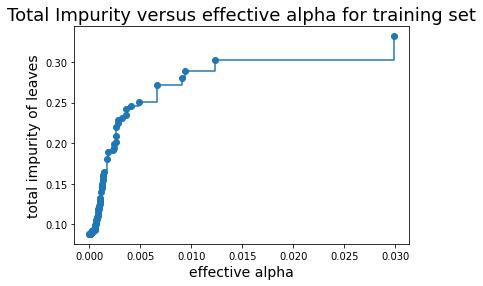

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=14)
ax.set_ylabel("total impurity of leaves", fontsize=14)
ax.set_title("Total Impurity versus effective alpha for training set", fontsize=18)

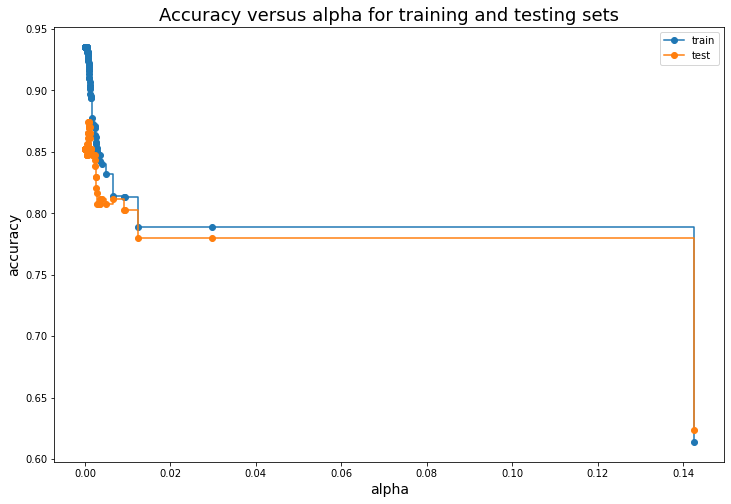

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig = plt.figure(figsize=(12,8))
plt.xlabel("alpha", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.title("Accuracy versus alpha for training and testing sets", fontsize=18)
plt.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

## 2.6 Variable use comparisson

In [ ]:
variables = ["Pclass",	"SibSp",	"Parch",	"Fare",	"Sexcode",	"FareCat",	"FamilyCount",	"AgeCat",	"Embarked_C",	"Embarked_Q",	"Embarked_S"]
combinations = [variables,["Sexcode","Pclass","AgeCat"],["Sexcode","Pclass","AgeCat","FamilyCount"],["Sexcode"],["Pclass","AgeCat"],["FamilyCount"]]

In [ ]:
X = data[variables]
y = data.Survived
# Cross-validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Instantiate model
kfoldtree = DecisionTreeClassifier()

# Model evaluation
scores = cross_val_score(kfoldtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Performance

print(f'Accuracy for all folds: {scores}')
print(f'Mean accuracy: {round(mean(scores),2)}')
print(f'Standard deviation: {round(std(scores),2)}')

Accuracy for all folds: [0.76536313 0.78089888 0.81460674 0.82022472 0.81460674]
Mean accuracy: 0.8
Standard deviation: 0.02


In [ ]:
means = []
stds = []
for i in combinations:
  X = data[i]
  y = data.Survived
  # Cross-validation
  cv = KFold(n_splits=50, random_state=1, shuffle=True)

  # Instantiate model
  kfoldtree = DecisionTreeClassifier()

  # Model evaluation
  scores = cross_val_score(kfoldtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  means.append(mean(scores))
  stds.append(std(scores))

  # Performance
  print("For ", i)
  #print(f'Accuracy for all folds: {scores}')
  print(f'Mean accuracy: {round(mean(scores),2)}')
  print(f'Standard deviation: {round(std(scores),2)}')
  print("\n")

For  ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sexcode', 'FareCat', 'FamilyCount', 'AgeCat', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Mean accuracy: 0.81
Standard deviation: 0.09


For  ['Sexcode', 'Pclass', 'AgeCat']
Mean accuracy: 0.8
Standard deviation: 0.09


For  ['Sexcode', 'Pclass', 'AgeCat', 'FamilyCount']
Mean accuracy: 0.8
Standard deviation: 0.1


For  ['Sexcode']
Mean accuracy: 0.79
Standard deviation: 0.1


For  ['Pclass', 'AgeCat']
Mean accuracy: 0.7
Standard deviation: 0.1


For  ['FamilyCount']
Mean accuracy: 0.67
Standard deviation: 0.14




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if __name__ == '__main__':


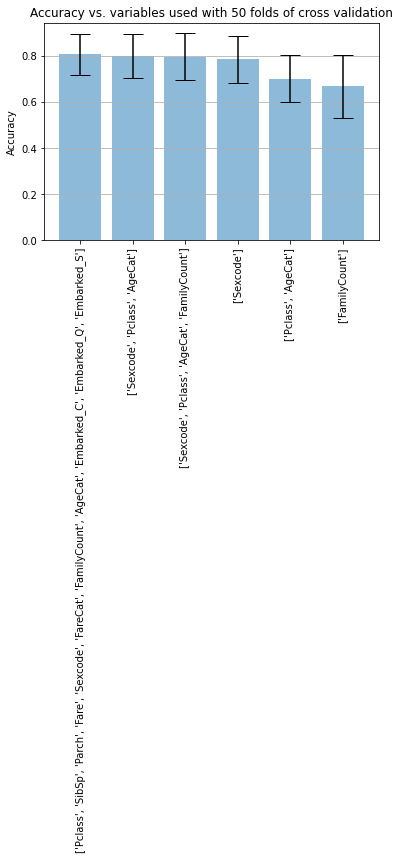

In [ ]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(["1","2","3","4","5","6"], means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticklabels(combinations, rotation='vertical')
ax.set_title('Accuracy vs. variables used with 50 folds of cross validation')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
X = data[variables]
y = data.Survived
kfoldtree = DecisionTreeClassifier()
kfoldtree.fit(X,y)

kaggle_test = kaggle_test_data[variables]
y_pred_tree = kfoldtree.predict(kaggle_test)

y_pred_tree_Survived = pd.Series(y_pred_tree)

pred_Id = kaggle_test_data["PassengerId"]

prediction_df_tree = pd.DataFrame({"PassengerId":pred_Id,"Survived":y_pred_tree_Survived})
prediction_df_tree["Survived"] = [0 if x == -1 else 1 for x in prediction_df_tree["Survived"]]

prediction_df_tree.to_csv("tree_prediction.csv",index=False)


# 3. Naive Bayes

In [ ]:
sample_sizes = [10,20,30,50,80,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,891]

X = data[["Pclass","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","EmbarkedCat","Survived"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

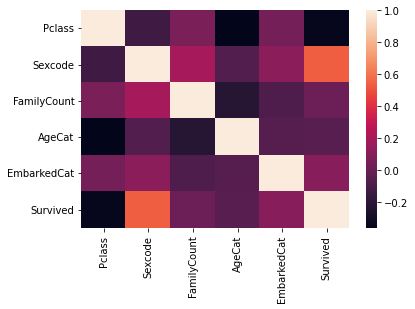

In [ ]:
X_ = data[["Pclass","Sexcode","FamilyCount","AgeCat","EmbarkedCat","Survived"]]
sns.heatmap(X_.corr(),annot=False)

X_ = shuffle(X_)
Y = X_.Survived
X_.drop(['Survived'],axis=1,inplace=True)

In [ ]:
X_.head()

,Pclass,Sexcode,FamilyCount,AgeCat,EmbarkedCat
720,2,1,2,0,0
94,3,0,1,3,0
176,3,0,5,1,0
771,3,0,1,2,0
28,3,1,1,1,2


In [ ]:
classifier = GaussianNB()
scores = cross_val_score(classifier, X_, Y, cv=5)
print("Mean accuracy",round(np.mean(scores),4))
print("Std accuracy",round(np.std(scores),4))

Mean accuracy 0.7867
Std accuracy 0.0351


In [ ]:
# different sample sizes

acc_avg_samples = []
acc_std_samples = []

for _ in sample_sizes:
  classifier = GaussianNB()
  scores = cross_val_score(classifier, X_[0:_], Y[0:_], cv=5)
  acc_avg_samples.append(np.mean(scores))
  acc_std_samples.append(np.std(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


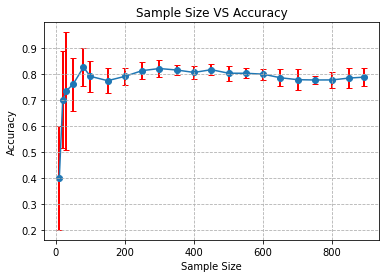

In [ ]:
plt.errorbar(sample_sizes, acc_avg_samples, acc_std_samples, fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1)

plt.title("Sample Size VS Accuracy")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")

plt.grid(linestyle = '--')
plt.show()

In [ ]:
# different splits

acc_avg_samples = []
acc_std_samples = []

cv = list(range(20))[2:]

for _ in cv:
  classifier = GaussianNB()
  scores = cross_val_score(classifier, X_, Y, cv=_)
  acc_avg_samples.append(np.mean(scores))
  acc_std_samples.append(np.std(scores))

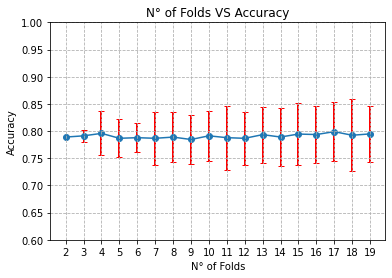

In [ ]:
plt.errorbar(cv, acc_avg_samples, acc_std_samples, fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1)

plt.title("N° of Folds VS Accuracy")
plt.xlabel("N° of Folds")
plt.ylabel("Accuracy")

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.grid(linestyle = '--')
plt.ylim((0.6,1))
plt.show()

In [ ]:
# calculate time 

acc_avg_samples = []
acc_std_samples = []

acc_avg_samples_ = []
acc_std_samples_ = []

attributs = [1,2,3,4,5]
attributs_ = []

for _ in attributs:
  X__ = X_.iloc[:, 0:_]
  attributs_.append(X__.columns.tolist())
  classifier = GaussianNB()
  scores = cross_validate(classifier, X__, Y, scoring='precision_macro',cv=5)
  acc_avg_samples.append(np.mean(scores['fit_time']))
  acc_std_samples.append(np.std(scores['fit_time']))

  scores = cross_val_score(classifier, X__, Y,cv=5)
  acc_avg_samples_.append(np.mean(scores))
  acc_std_samples_.append(np.std(scores))  

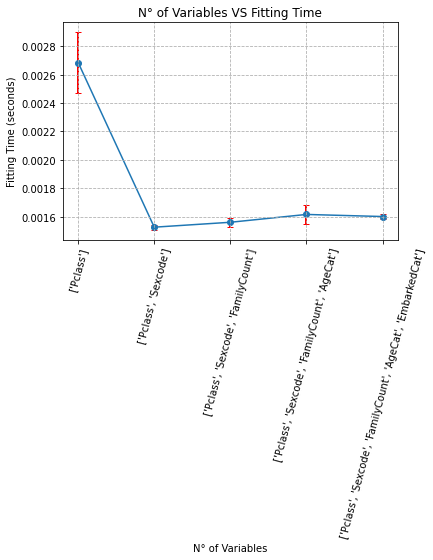

In [ ]:
plt.errorbar(attributs, acc_avg_samples, acc_std_samples, fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1)

plt.title("N° of Variables VS Fitting Time")
plt.xlabel("N° of Variables")
plt.ylabel("Fitting Time (seconds)")

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
positions = (1, 2, 3, 4, 5)
labels = (attributs_[0], attributs_[1], attributs_[2], attributs_[3], attributs_[4])
plt.xticks(positions, labels)
plt.xticks(rotation=75)

plt.grid(linestyle = '--')
plt.show()

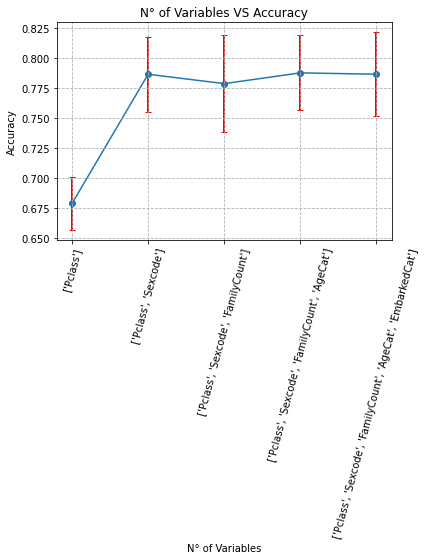

In [ ]:
plt.errorbar(attributs, acc_avg_samples_, acc_std_samples_, fmt='-o', ecolor = 'red', elinewidth = 2, capthick = 1, capsize = 3, zorder = 1)

plt.title("N° of Variables VS Accuracy")
plt.xlabel("N° of Variables")
plt.ylabel("Accuracy")

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
positions = (1, 2, 3, 4, 5)
labels = (attributs_[0], attributs_[1], attributs_[2], attributs_[3], attributs_[4])
plt.xticks(positions, labels)
plt.xticks(rotation=75)

plt.grid(linestyle = '--')
plt.show()

In [ ]:
# prepare data to kaggle

X_train = data[["Pclass","Sexcode","FamilyCount","AgeCat","EmbarkedCat"]]
y_train = data.Survived
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
kaggle_test = kaggle_test_data[["Pclass","Sexcode","FamilyCount","AgeCat","EmbarkedCat"]]
y_pred = bayes_model.predict(kaggle_test)
y_pred_Survived = pd.Series(y_pred)


pred_Id = kaggle_test_data["PassengerId"]

In [ ]:
y_pred_Survived = (y_pred_Survived+1)/2
y_pred_Survived = y_pred_Survived.astype(int)

In [ ]:
prediction_df = pd.DataFrame({"PassengerId":pred_Id,"Survived":y_pred_Survived})
prediction_df.to_csv("bayes_prediction.csv",index=False)